# **K-Mean**

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, : 2]

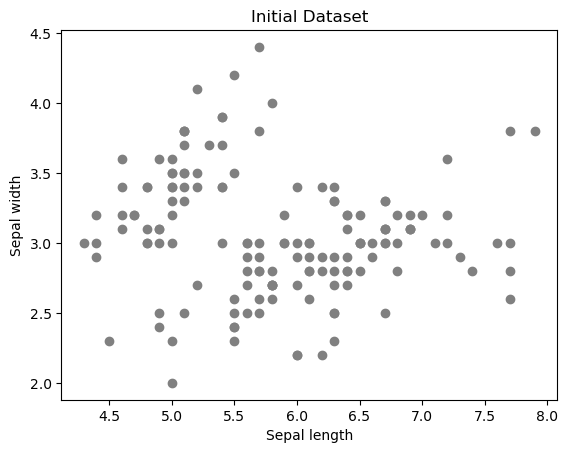

In [3]:
# Plot data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## KMeans classification

In [4]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k                   # Number of clusters
        self.max_iters = max_iters   # Maximum number of iterations
        self.centroids = None        
        self.clusters = None         

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)

            self.plot_clusters(data, i)

            new_centroids = self.update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.plot_final_clusters(data)


    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

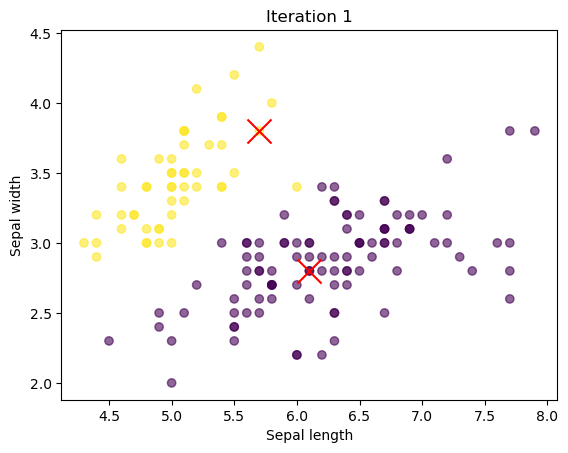

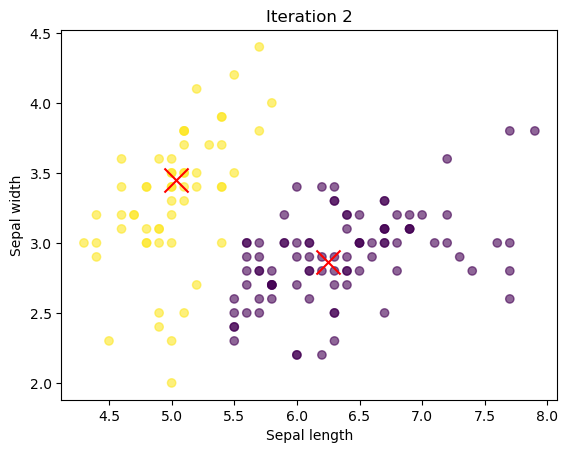

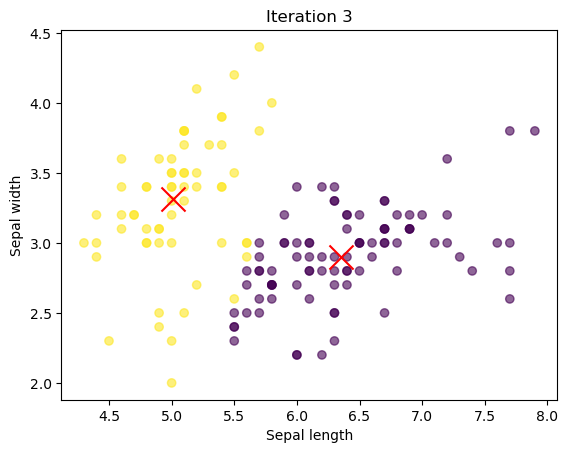

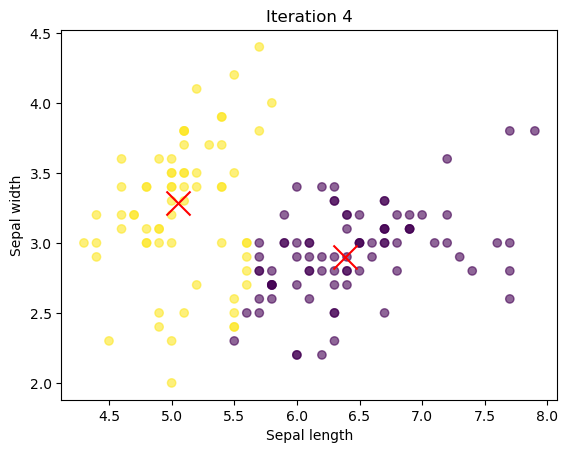

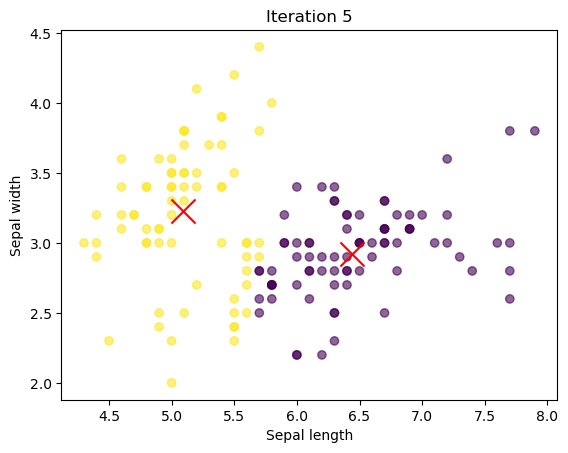

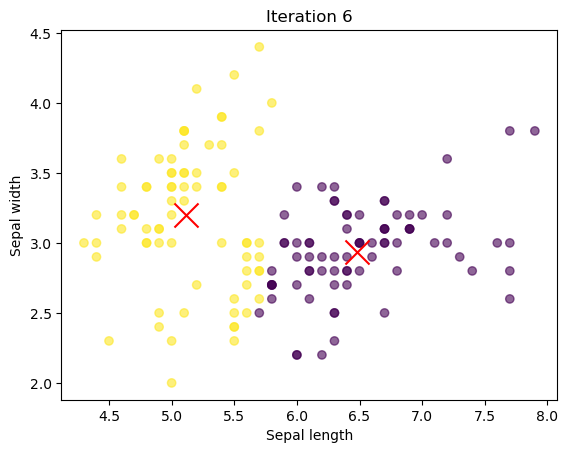

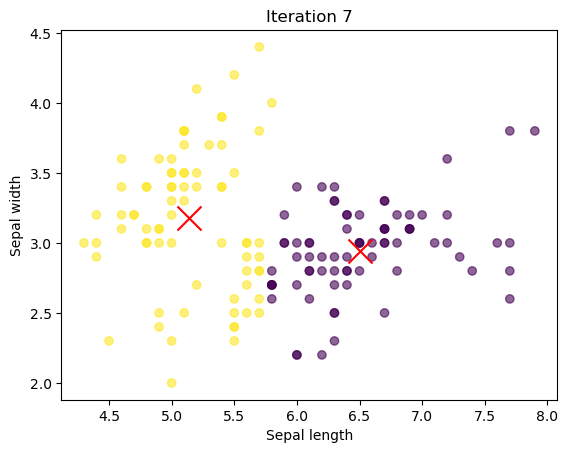

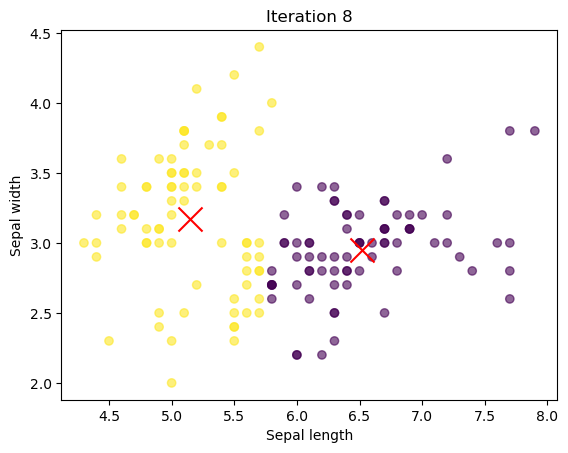

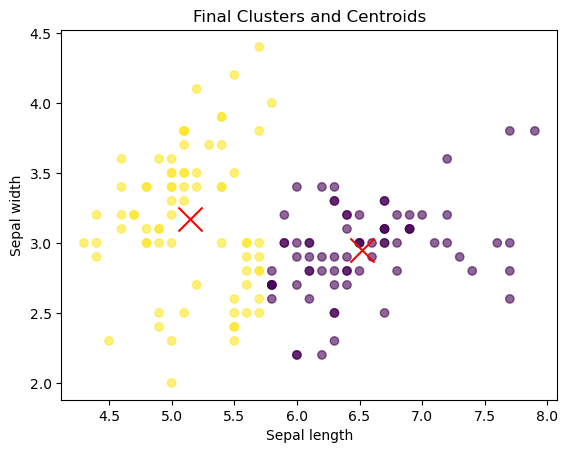

In [5]:
# Results
kmeans = KMeans(k=2)
kmeans.fit(data)

In [6]:
data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5],
])

In [7]:
import pandas as pd
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])
df # Test

,Feature1,Feature2,Feature3
0,2.0,3.0,1.5
1,3.0,3.5,2.0
2,3.5,3.0,2.5
3,8.0,8.0,7.5
4,8.5,8.5,8.0
5,9.0,8.0,8.5
6,1.0,2.0,1.0
7,1.5,2.5,1.5


## Q8

In [8]:
centroids = np.array([
    [2.0, 3.0, 1.5],
    [8.0, 6.0, 7.5],
])

## Q9

In [9]:
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [10]:
euclidean_dist(np.array([2.0, 3.0, 1.5]), [8.0, 8.0, 7.5])

9.848857801796104

## Q10

In [11]:
# Euclidean distance to cluster #1
euclidean_dist(np.array([3.0, 3.5, 2.0]), centroids[0])

1.224744871391589

In [12]:
# Euclidean distance to cluster #2
euclidean_dist(np.array([3.0, 3.5, 2.0]), centroids[1])

7.842193570679061

## Q13

In [13]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k                   # Số cụm
        self.max_iters = max_iters   # Số vòng lặp tối đa
        self.centroids = None        # Tọa độ tâm cụm
        self.clusters = None         # Cụm của từng điểm dữ liệu

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        return np.argmin(distances, axis=1)

    def update_centroids(self, data):

        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):

        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)

            new_centroids = self.update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids
        print(self.centroids)



In [14]:
kmeans = KMeans(k=3)
kmeans.fit(data)

[[3.25       3.25       2.25      ]
 [8.5        8.16666667 8.        ]
 [1.5        2.5        1.33333333]]
